In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel('Enduro 2022 CT HT FT_After0624.xlsx')
df.tDateTime = pd.to_datetime(df.tDateTime, utc=True).dt.tz_convert('Asia/Taipei')
df.tDateTime = df.tDateTime.dt.strftime('%m-%d')

CT

In [3]:
ct = df[(df.ItemNameType == 15832) & (df['CT GPS_(L1+L5) by ref st'].isin([0,1]))]

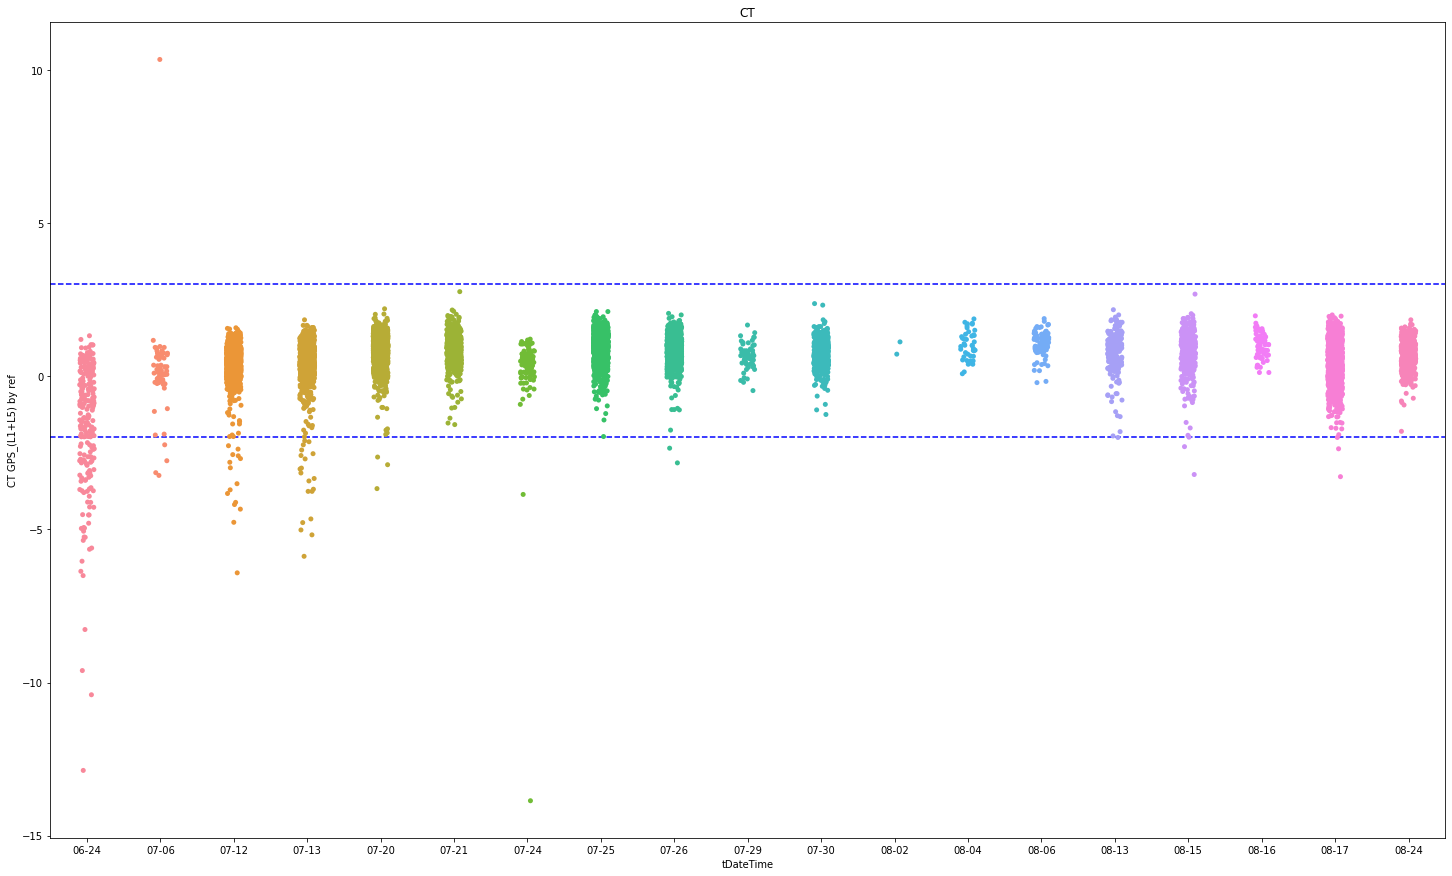

In [4]:
plt.figure(figsize=(25,15))
sns.stripplot(data=ct, x='tDateTime',y='CT GPS_(L1+L5) by ref')
plt.axhline(3, ls='--', color='blue')
plt.axhline(-2, ls='--', color='blue')
plt.title('CT')

plt.savefig('CT GPS_(L1+L5) by ref',bbox_inches = "tight", facecolor='white', transparent=False, dpi=300)

HT

In [5]:
ht = df[(df.ItemNameType == 15833) & (df['HT GPS_L5 by ref st'].isin([0,1]))]

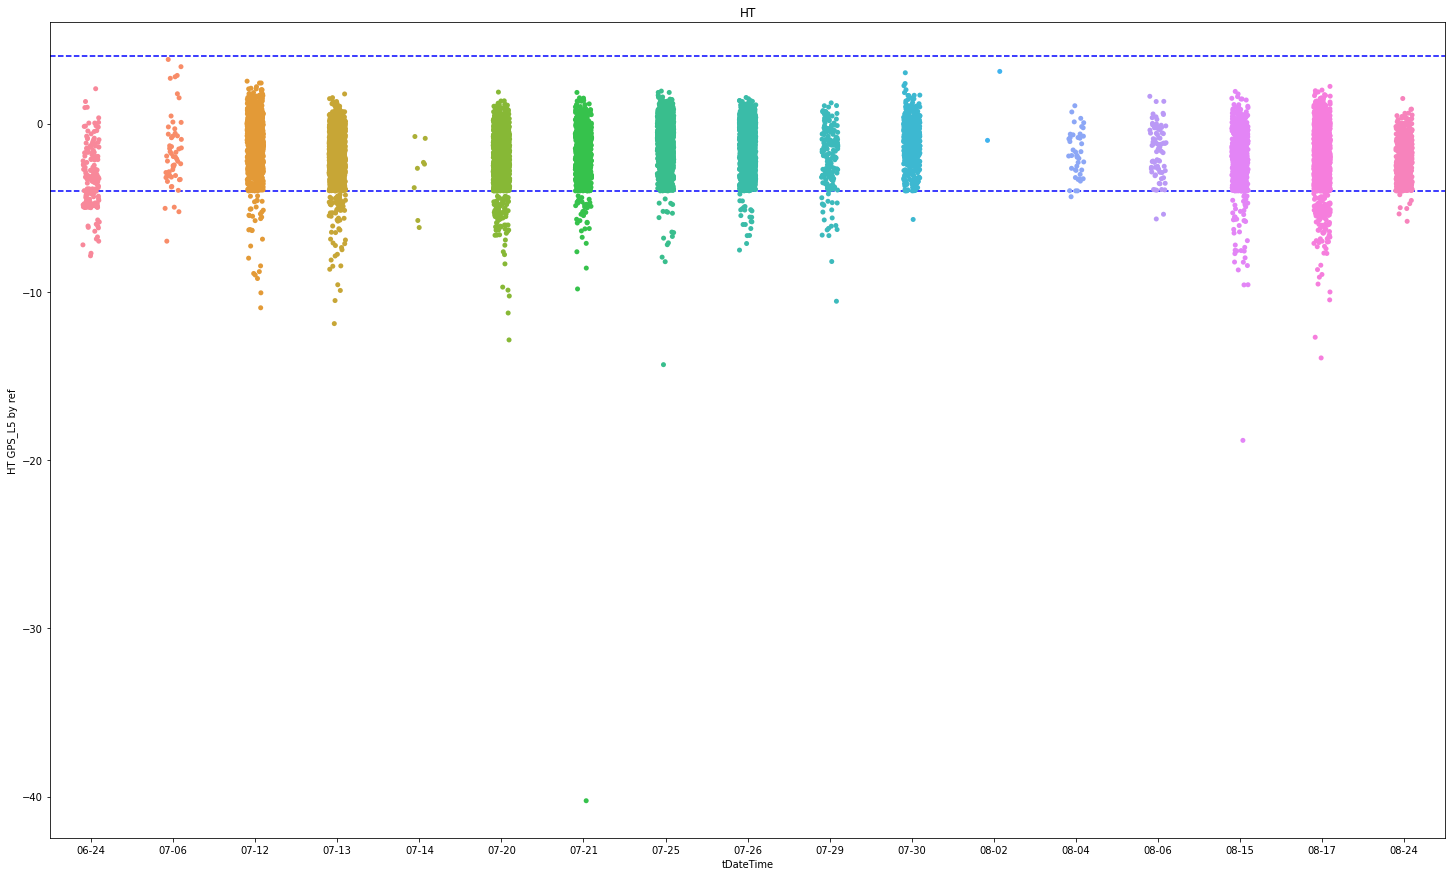

In [6]:
plt.figure(figsize=(25,15))
sns.stripplot(data=ht, x='tDateTime',y='HT GPS_L5 by ref')
plt.axhline(4, ls='--', color='blue')
plt.axhline(-4, ls='--', color='blue')
plt.title('HT')
plt.savefig('HT GPS_L5 by ref',bbox_inches = "tight", facecolor='white', transparent=False, dpi=300)

In [21]:
ht_retry = ht.groupby('tDateTime')['HT GPS_L5 by ref st'].agg(['sum','count'])
ht_retry['NG'] = ht_retry['count']-ht_retry['sum']
ht_retry['Retry'] = ht_retry['NG']/ht_retry['count']

In [26]:
ht_retry

,sum,count,NG,Retry
tDateTime,,,,
06-24,156,170,14,0.082353
07-06,52,56,4,0.071429
07-12,978,1010,32,0.031683
07-13,1185,1251,66,0.052758
07-14,6,8,2,0.250000
07-20,1311,1396,85,0.060888
07-21,744,781,37,0.047375
07-25,1233,1251,18,0.014388
07-26,1284,1306,22,0.016845


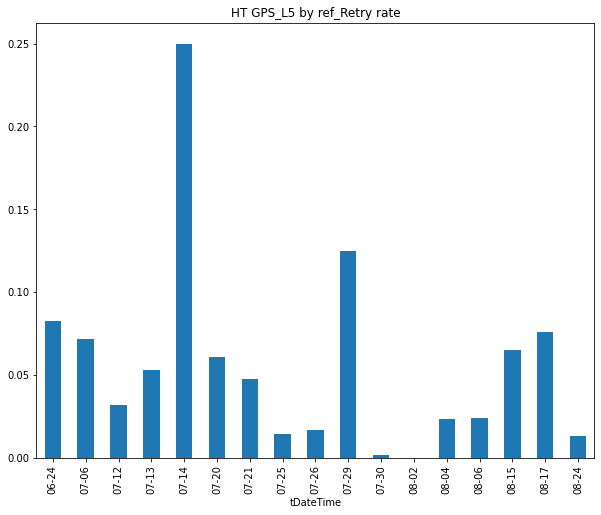

In [32]:
plt.figure(figsize=(10,8))
ht_retry['Retry'].plot.bar()
plt.title('HT GPS_L5 by ref_Retry rate')
plt.savefig('HT GPS_L5 by ref_Retry rate',bbox_inches = "tight", facecolor='white', transparent=False, dpi=300)

FT

In [8]:
ft = df[(df.ItemNameType == 15834) & (df['FT GPS_(L1+L5) by ref st'].isin([0,1]))].sort_values('tDateTime')

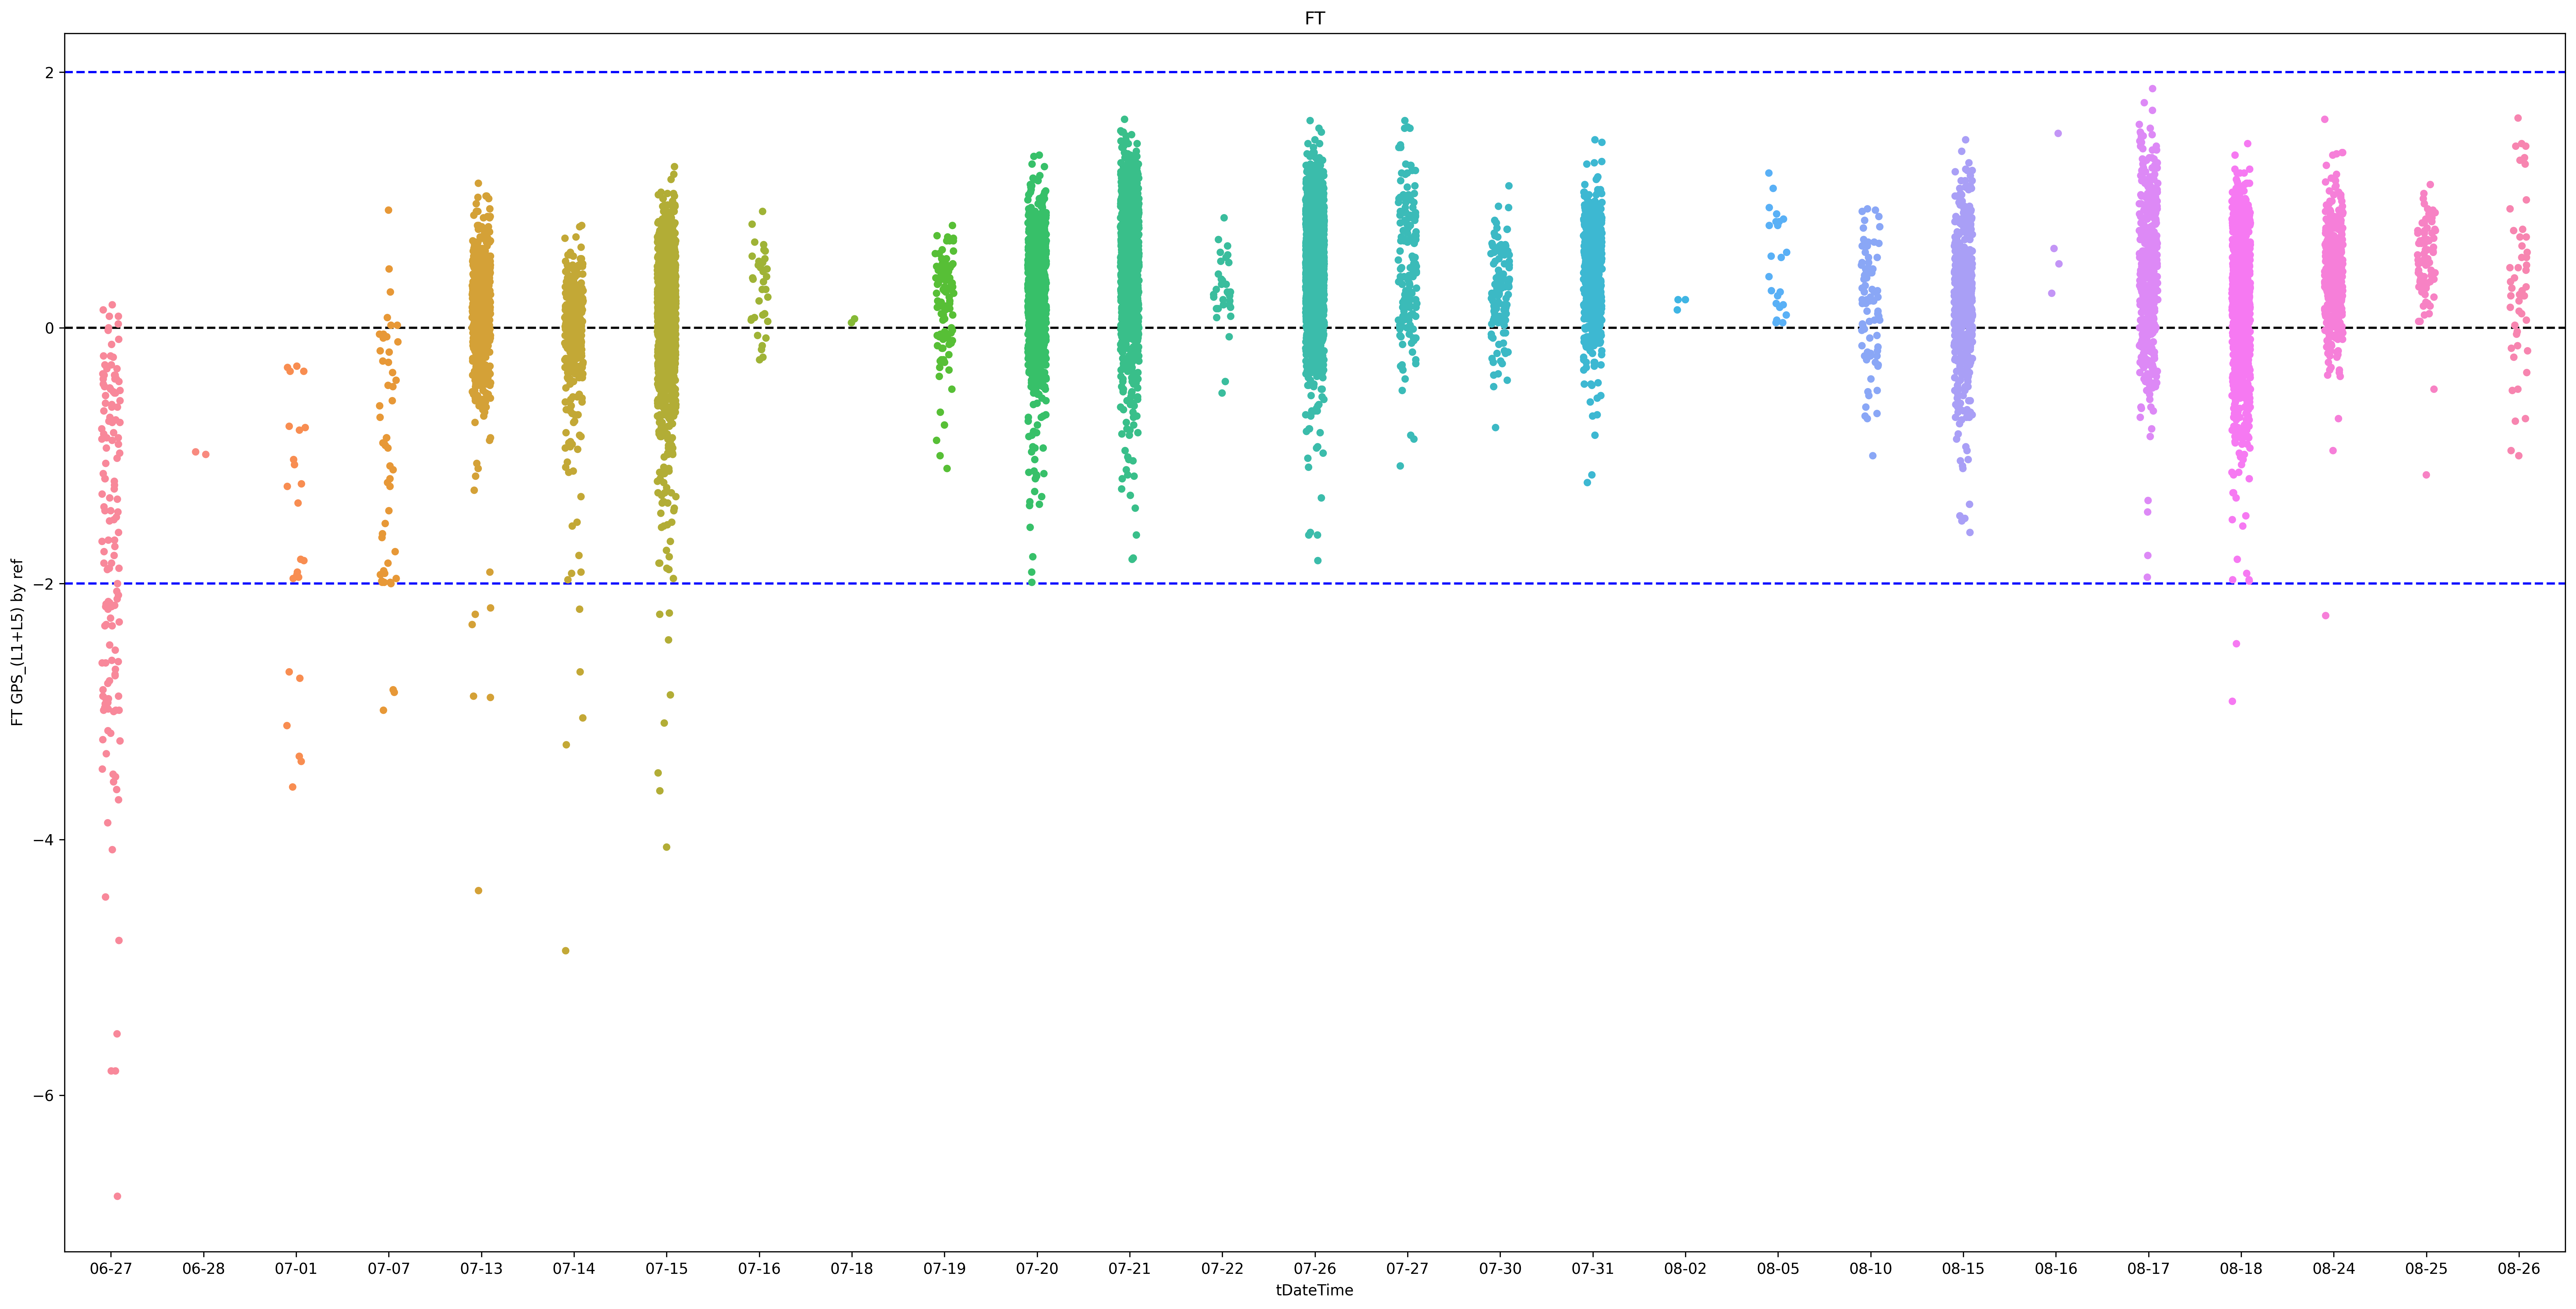

In [9]:
plt.figure(figsize=(30,15), dpi=300)
sns.stripplot(data=ft, x='tDateTime',y='FT GPS_(L1+L5) by ref')
plt.axhline(2, ls='--', color='blue')
plt.axhline(-2, ls='--', color='blue')
plt.axhline(0, ls='--', color='black')
plt.title('FT')
plt.savefig('FT GPS_(L1+L5) by ref',bbox_inches = "tight", facecolor='white', transparent=False, dpi=300)